# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [54]:
# Load LUT
if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

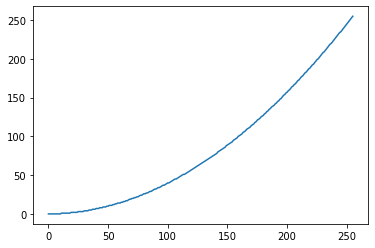

In [55]:
# LUT example
plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

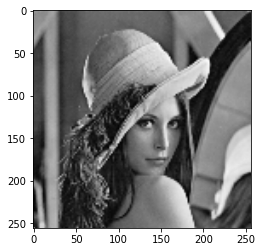

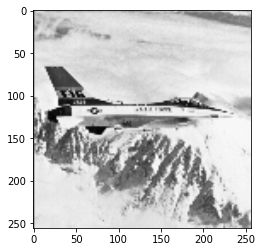

In [56]:
# Load required files
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

# Read file from disk
LenaImg = cv2.imread('lena.bmp')
JetImg = cv2.imread('jet.bmp')

# BRG2GRAY
LenaImg = cv2.cvtColor(LenaImg, cv2.COLOR_BGR2GRAY)
JetImg = cv2.cvtColor(JetImg, cv2.COLOR_BGR2GRAY)

# Matplotlib display
plt.imshow(LenaImg)
plt.gray()
plt.show()

plt.imshow(JetImg)
plt.gray()
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

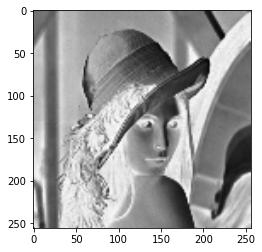

In [57]:
# LUT conversion
LenaLutImg = cv2.LUT(LenaImg, lut.odwrotna)
plt.imshow(LenaLutImg)
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [74]:
def LUT(img, lut):
  lutImg = cv2.LUT(img, lut)

  f, (ax1,ax2,ax3) = plt.subplots(1,3)

  ax1.set_title('Lut')
  ax1.set_aspect('equal')
  ax1.plot(lut)
  ax1.axis('off')

  ax2.set_title('Original')
  ax2.imshow(img)
  ax2.axis('off')

  ax3.set_title('Output')
  ax3.imshow(lutImg)
  ax3.axis('off')

  plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

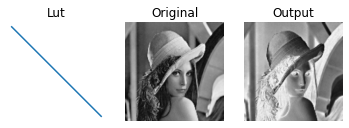

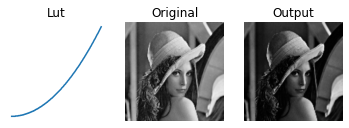

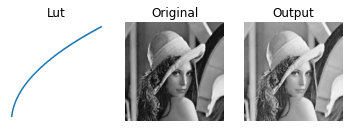

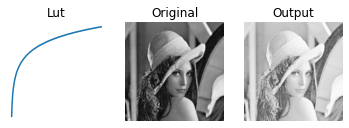

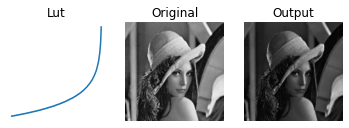

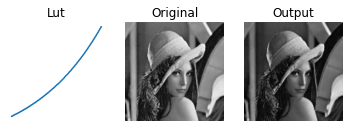

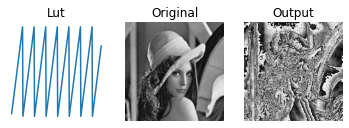

In [73]:
# All LUT conversion
LUT(LenaImg, lut.odwrotna)
LUT(LenaImg, lut.kwadratowa)
LUT(LenaImg, lut.pierwiastkowa)
LUT(LenaImg, lut.log)
LUT(LenaImg, lut.odwlog)
LUT(LenaImg, lut.wykladnicza)
LUT(LenaImg, lut.pila)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

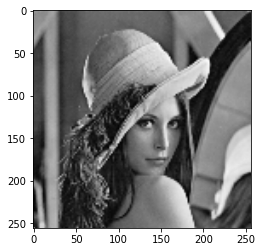

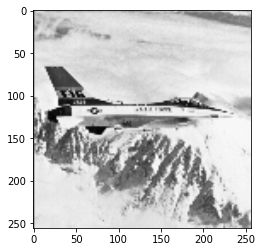

In [ ]:
# Matplotlib display
plt.imshow(LenaImg)
plt.show()

plt.imshow(JetImg)
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

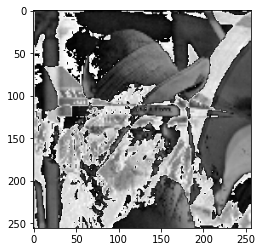

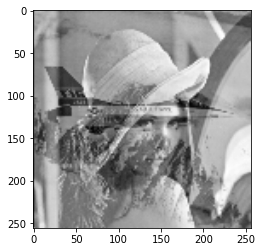

In [ ]:
# Exercise
LenaImg= LenaImg.astype('uint16')
JetImg = JetImg.astype('uint16')
addImg = cv2.add(LenaImg, JetImg)
addImg = addImg.astype('uint8')
plt.imshow(addImg)
plt.show()
# Odcięty jest MSB 


# My version
addImg = cv2.add(LenaImg, JetImg)/2
addImg = addImg.astype('uint8')
plt.imshow(addImg)
plt.show()

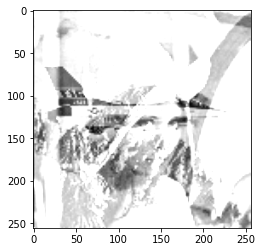

In [ ]:
# Add images
addImg = cv2.add(LenaImg, JetImg)
plt.imshow(addImg)
plt.show()

In [ ]:
# Wynik jest dużo jaśniejszy ponieważ po dodaniu wszystkie wartości znajdują się bliżej 255

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

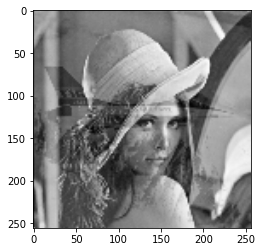

In [ ]:
# Linear images combination
combImg = cv2.addWeighted(LenaImg,0.7,JetImg,0.3,0)
plt.imshow(combImg)
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

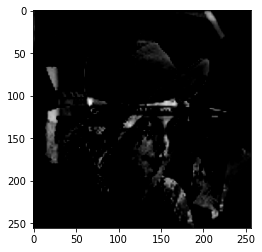

In [ ]:
# Subtract images
subImg = cv2.subtract(LenaImg,JetImg)
plt.imshow(subImg)
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

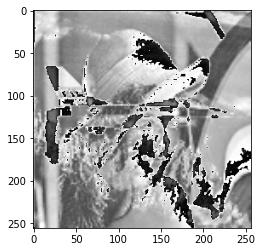

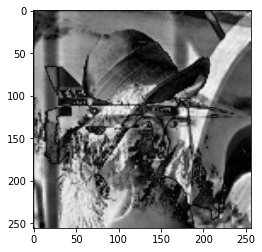

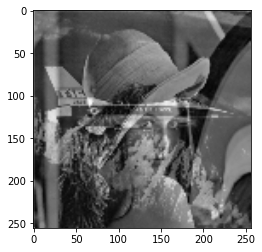

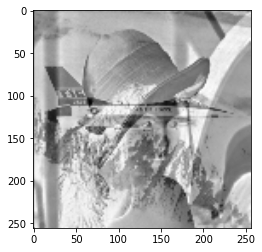

In [ ]:
# Exercise delete <0
LenaImg= LenaImg.astype('int16')
JetImg = JetImg.astype('int16')
subImg = cv2.subtract(LenaImg, JetImg)
subImg = subImg.astype('uint8')
plt.imshow(subImg)
plt.show()

# Exercise abs
subImg = cv2.subtract(LenaImg, JetImg)
subImg = np.abs(subImg)
subImg = subImg.astype('uint8')
plt.imshow(subImg)
plt.show()

# My version
subImg = (cv2.subtract(LenaImg, JetImg)+255)/2
subImg = subImg.astype('uint8')
plt.imshow(subImg)
plt.show()

# My version
subImg = (cv2.subtract(JetImg, LenaImg)+255)/2
subImg = subImg.astype('uint8')
plt.imshow(subImg)
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

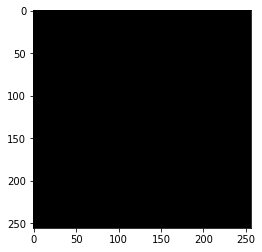

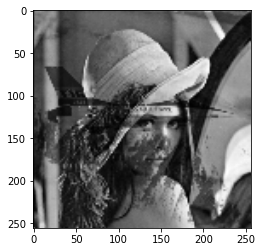

In [ ]:
# Image multiply uint8
LenaImg= LenaImg.astype('uint8')
JetImg = JetImg.astype('uint8')
multImg = cv2.multiply(LenaImg,JetImg)
plt.imshow(multImg)
plt.show()
# Wynik jest czarny ponieważ po mnożeniu wartości przeważnie mają wartość większą niż 255

# Image multiply uint16
LenaImg= LenaImg.astype('uint16')
JetImg = JetImg.astype('uint16')
multImg = cv2.multiply(LenaImg,JetImg)
plt.imshow(multImg)
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

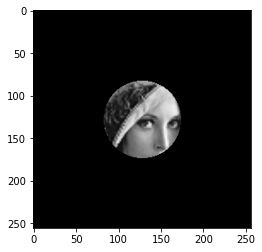

In [ ]:
# Mask multiply
if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
  
mask = cv2.imread('kolo.bmp')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

mask = mask.astype('bool').astype('uint8')
LenaImg = LenaImg.astype('uint8')
multImg = cv2.multiply(LenaImg,mask)
plt.imshow(multImg)
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

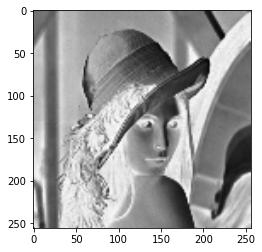

In [ ]:
invImg = cv2.bitwise_not(LenaImg)
plt.imshow(invImg)
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

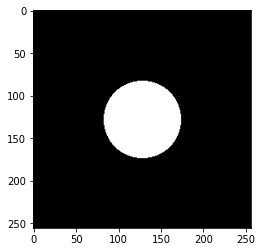

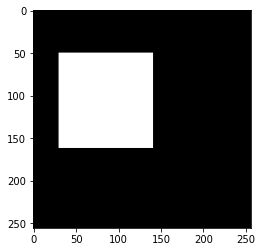

In [ ]:
if not os.path.exists("kwadrat.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

circleImg = cv2.imread("kolo.bmp")
circleImg = cv2.cvtColor(circleImg, cv2.COLOR_BGR2GRAY)

squareImg = cv2.imread("kwadrat.bmp")
squareImg = cv2.cvtColor(squareImg, cv2.COLOR_BGR2GRAY)

plt.imshow(circleImg)
plt.show()
plt.imshow(squareImg)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

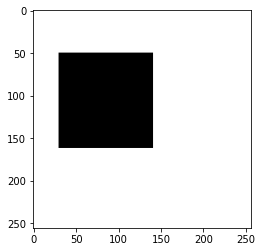

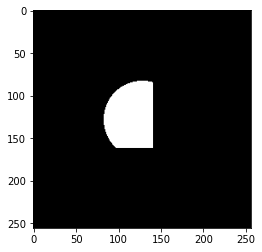

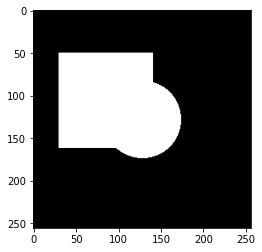

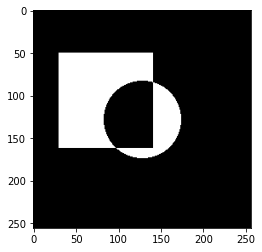

In [ ]:
img = ~squareImg
plt.imshow(img)
plt.show()

img = squareImg&circleImg
plt.imshow(img)
plt.show()

img = squareImg|circleImg
plt.imshow(img)
plt.show()

img = squareImg^circleImg
plt.imshow(img)
plt.show()